# **Classificação de dígitos: MNIST dataset**

Objetivos:

- Mostrar utilização da função de erro sparse_categorical_cross_entropy e ativação softmax na camada de saída.

- Mostrar como utilizar checkpoint para salvar o melhor modelo.

### Bibliotecas

In [2]:
import tensorflow as tf
from tensorflow import keras, random
import matplotlib.pyplot as plt
import numpy as np

#from keras import Sequential, layers, datasets

### Importando os dados de MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('Conjunto de treinamento: ', len(x_train))
print('Conjunto de teste: ', len(x_test))
print('Shape de um padrão: ', x_train[0].shape)

11490434/11490434 [==============================] - 0s 0us/step
Conjunto de treinamento:  60000
Conjunto de teste:  10000
Shape de um padrão:  (28, 28)


### Entendendo os dados de treinamento

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train.max()

255

In [12]:
print(y_train[0])

3


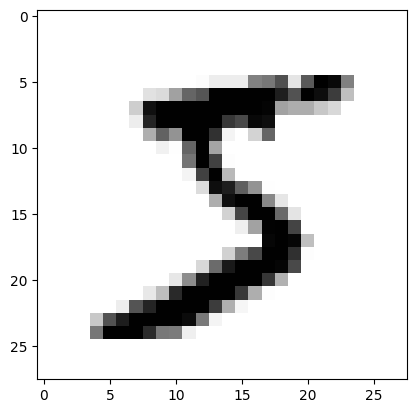

In [13]:
#plt.matshow(x_train[0], cmap=plt.cm.binary)
plt.imshow(x_train[0], cmap=plt.cm.binary)
#plt.imshow(x_train[0], cmap=plt.cm.Blues)


In [ ]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Parênteses: Um pouco de Numpy

Listas e matrizes sem NumPy

In [ ]:
w = [1.5, 3.6, 4.8, 45.1]
w2 = [2.4, 3.5, 6.8, 10.1]

In [ ]:
w + w2

[1.5, 3.6, 4.8, 45.1, 2.4, 3.5, 6.8, 10.1]

In [ ]:
A = [
    [2.0, 3.0], 
    [4.0, 1.0]]
    
B = [
    [1.0, 2.0], 
    [1.0, 1.0]]

In [ ]:
A + B

[[2.0, 3.0], [4.0, 1.0], [1.0, 2.0], [1.0, 1.0]]

In [ ]:
A

[[2.0, 3.0], [4.0, 1.0]]

Listas e matrizes com NumPy

In [ ]:
w = np.array([1.5, 3.6, 4.8, 45.1])
w2 = np.array([2.4, 3.5, 6.8, 10.1])

In [ ]:
w + w2

array([ 3.9,  7.1, 11.6, 55.2])

In [ ]:
A = np.array(A)
B = np.array(B)

In [ ]:
A

array([[2., 3.],
       [4., 1.]])

In [ ]:
B

array([[1., 2.],
       [1., 1.]])

In [ ]:
A + B

array([[3., 5.],
       [5., 2.]])

In [ ]:
A @ B

array([[5., 7.],
       [5., 9.]])

### Exibindo algumas imagens

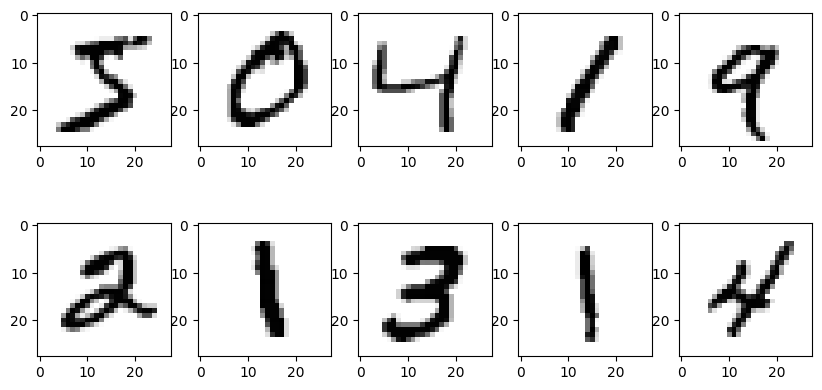

In [14]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

### Normalizando as entradas

In [15]:
x_train = x_train / 255
x_test = x_test / 255

### Separando conjuntos de validação e teste

In [16]:
x_valid = x_test[0:8000]
x_test = x_test[8000:]
y_valid = y_test[0:8000]
y_test = y_test[8000:]

In [17]:
print("Treinamento: ", len(x_train))
print("Validação: ", len(x_valid))
print("Test: ", len(x_test))

Treinamento:  60000
Validação:  8000
Test:  2000


In [18]:
y_valid.shape

(8000,)

### Modelando a rede neural

In [19]:
seed = 123
random.set_seed(seed)

As duas formas abaixo para descrição da arquitetura da rede são equivalentes.

In [20]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model = keras.Sequential([
                          
    keras.layers.Flatten(input_shape=(28,28)), # converte matriz em um vetor
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compilando o modelo com o Otimizador.

In [22]:
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Treinando a rede neural

Checkpoint callback para salvar melhor rede na validação

In [23]:
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/sample_data/best_valid.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

Treinamento

In [24]:
seed = 123
random.set_seed(seed)

history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, shuffle=True, callbacks=[model_checkpoint_callback], verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3927 - accuracy: 0.8932 - val_loss: 0.2558 - val_accuracy: 0.9245
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2250 - accuracy: 0.9352 - val_loss: 0.2200 - val_accuracy: 0.9366
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1911 - accuracy: 0.9442 - val_loss: 0.1934 - val_accuracy: 0.9419
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1688 - accuracy: 0.9508 - val_loss: 0.1814 - val_accuracy: 0.9459
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1535 - accuracy: 0.9550 - val_loss: 0.1728 - val_accuracy: 0.9479
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1416 - accuracy: 0.9584 - val_loss: 0.1643 - val_accuracy: 0.9511
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1332 - accuracy: 0.9603 - val_loss: 0.1604 - val_accuracy:

### Histórico do Treinamento

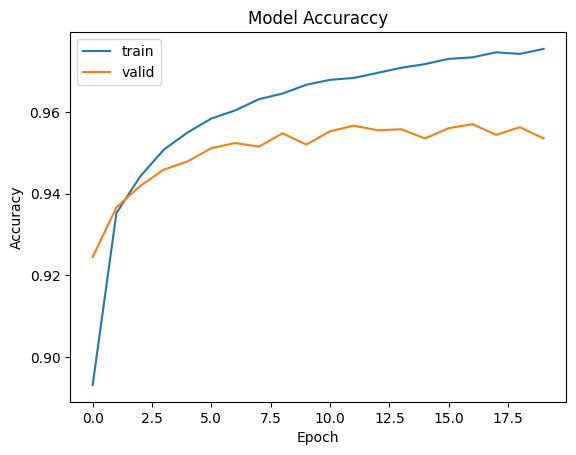

In [25]:
import matplotlib.pyplot as plt #Para Gerar Plots

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuraccy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

### Avaliando a rede neural

Rede no final do treinamento

In [26]:
model.evaluate(x_train, y_train)
model.evaluate(x_valid, y_valid)
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9680


[0.11410464346408844, 0.9679999947547913]

Rede salva com a melhor acurácia

In [27]:
model.load_weights(checkpoint_filepath)

model.evaluate(x_train, y_train)
model.evaluate(x_valid, y_valid)
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9695


[0.11016279458999634, 0.9695000052452087]

### Aplicando a rede neural

In [28]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


### Entendendo a predição

Vizualizando algumas imagens do conjunto de teste

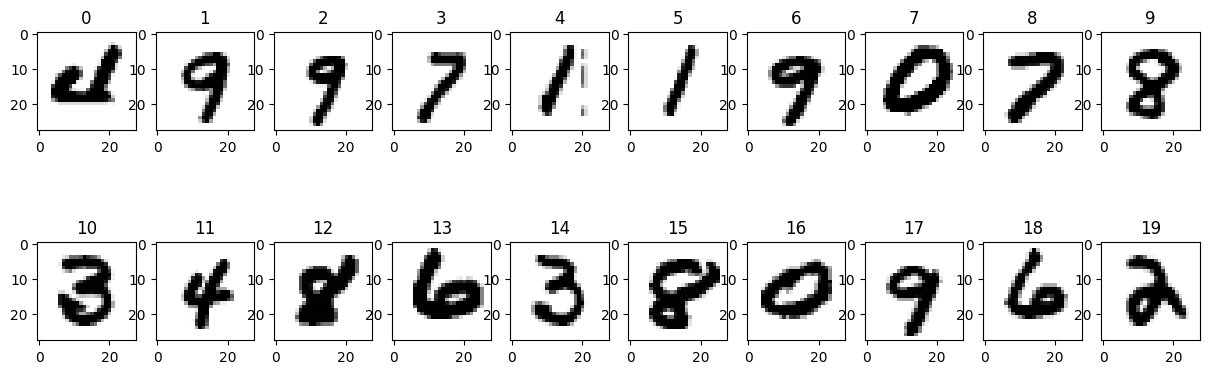

In [29]:
plt.figure(figsize=(15,5))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.title(i)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()

In [30]:
print('Saída da RN: ', y_pred[3])

Saída da RN:  [3.2336176e-09 3.2101558e-05 6.0132734e-04 3.6627881e-02 4.2318176e-12
 3.3505628e-08 9.4783597e-15 9.5939612e-01 1.9837730e-03 1.3586584e-03]


In [31]:
print('\nDígito predito: ', y_pred[3].argmax())


Dígito predito:  7


In [33]:
y_pred_labels = [i.argmax() for i in y_pred]
y_pred_labels[:20]

[4, 9, 9, 7, 1, 1, 9, 0, 7, 8, 3, 4, 8, 6, 3, 8, 0, 9, 6, 2]

### Matriz de Confusão

Text(0.5, 47.7222222222222, 'Predicted')

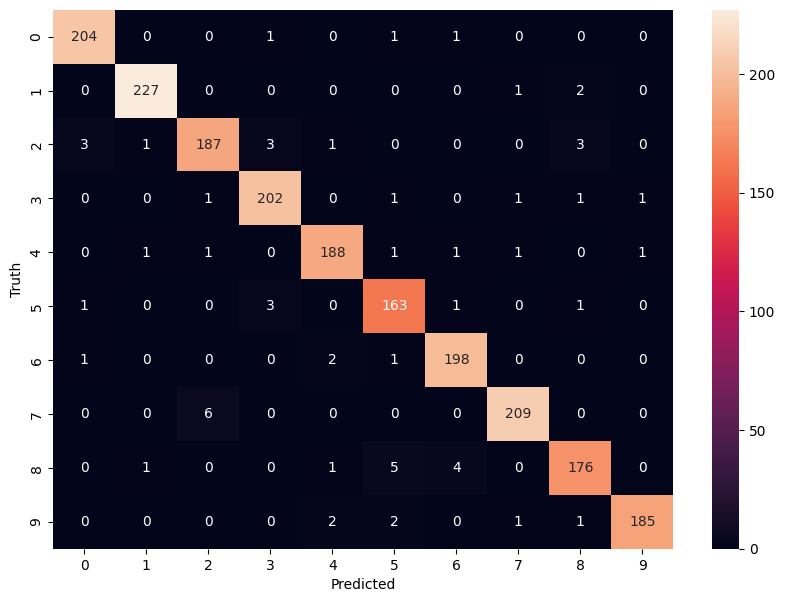

In [35]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Truth')
plt.xlabel('Predicted')